In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#ouverture et lecture de fichier SMS
data_SMS = open('D:/L3/Projet-Tuto/SMSSpamCollection.txt').read()
  #remplacer les \n par des \t pour faciliter la suppression et la searation
data_SMS= data_SMS.replace('\n','\t')
  #enlever les separateur de text et transformer en list
list_SMS = data_SMS.split("\t")
  #creation de colomn label pour les spam et ham
labels = list_SMS[0::2]
labels = labels[:len(labels)-1]
text   = list_SMS[1::2]
df_SMS = pd.DataFrame(list(zip(text, labels)))
df_SMS.columns = ['text', 'labels']
pd.set_option('display.max_colwidth', 150)
df_SMS.head()

text  \
0                                        Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                          Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...   
3                                                                                                      U dun say so early hor... U c already then say...   
4                                                                                          Nah I don't think he goes to usf, he lives around here though   

  labels  
0    ham  
1    ham  
2   spam  
3    ham  
4    ham

In [6]:
from nltk.tokenize import word_tokenize
import string
string.punctuation
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction import text

def remove_punkt(string_):
    word_list_no_punkt = "".join([char for char in string_ if char not in string.punctuation])
    return word_list_no_punkt

df_SMS['cleaned_text'] = df_SMS['text'].apply(lambda x: remove_punkt(x))
df_SMS['cleaned_text'] = df_SMS['cleaned_text'].apply(lambda x: str.lower(x))
pd.set_option('display.max_colwidth', 50)
df_SMS= df_SMS[['labels', 'text', 'cleaned_text']]
df_SMS['tokenized_words'] = df_SMS['cleaned_text'].apply(lambda x: word_tokenize(x))
stopwords_nltk = list(stopwords.words('english'))
stopwords_sklearn = list(text.ENGLISH_STOP_WORDS)
stopwords_merged= list(set(stopwords_nltk + stopwords_sklearn ))
stopwords_merged = sorted(stopwords_merged)
def remove_stopwords(tokenized_words):
    stopwords_removed = [word for word in tokenized_words if word not in stopwords_merged]
    return stopwords_removed
df_SMS['stop_words_removed'] = df_SMS['tokenized_words'].apply(lambda x: remove_stopwords(x))

wnlm = nltk.WordNetLemmatizer()
def lemmatize(tokens):
    lemmatized = [wnlm.lemmatize(token) for token in tokens]
    return lemmatized
df_SMS['lemmatized_words'] = df_SMS['stop_words_removed'].apply(lambda x: lemmatize(x))
ps = PorterStemmer()
def stemSet(wordList):
    wordSet = []
    for word in wordList:
        wordSet.append(ps.stem(word))
    return wordSet
df_SMS['stemWordSet'] = df_SMS['lemmatized_words'].apply(lambda x:stemSet(x))
df_SMS['length_text'] = df_SMS['text'].apply(lambda x: len(x) - x.count(" "))
def capital_letters(text):
    k = sum([1 for i in text if i.isupper()])
    capital_percent = k/(len(text) - text.count(" "))*100
    return round(capital_percent,3)
df_SMS['capital%'] = df_SMS['text'].apply(lambda x: capital_letters(x))
def punc_percent(k):
    punkt = sum([1 for i in k if i in string.punctuation])
    return round(punkt/(len(k) - k.count(" "))*100,3)
df_SMS['punc%'] = df_SMS['text'].apply(lambda x: punc_percent(x))
df_SMS['final_text']=[" ".join(text) for text in df_SMS['lemmatized_words'].values]
df_SMS.head()


labels                                               text  \
0    ham  Go until jurong point, crazy.. Available only ...   
1    ham                      Ok lar... Joking wif u oni...   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3    ham  U dun say so early hor... U c already then say...   
4    ham  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in 2 a wkly comp to win fa cup fina...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                     tokenized_words  \
0  [go, until, jurong, point, crazy, available, o...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3  [u, dun, say, so, early, hor, u, c, already, t...   
4  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                  stop_words_removed  \
0  [jurong, point, crazy, available, bugis, n, gr...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3               [u, dun, say, early, hor, u, c, say]   
4               [nah, dont, think, goes, usf, lives]   

                                    lemmatized_words  \
0  [jurong, point, crazy, available, bugis, n, gr...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3               [u, dun, say, early, hor, u, c, say]   
4                  [nah, dont, think, go, usf, life]   

                                         stemWordSet  length_text  capital%  \
0  [jurong, point, crazi, avail, bugi, n, great, ...           92     3.261   
1                       [ok, lar, joke, wif, u, oni]           24     8.333   
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...          128     7.812   
3               [u, dun, say, earli, hor, u, c, say]           39     5.128   
4                  [nah, dont, think, go, usf, life]           49     4.082   

    punc%                                         final_text  
0   9.783  jurong point crazy available bugis n great wor...  
1  25.000                            ok lar joking wif u oni  
2   4.688  free entry 2 wkly comp win fa cup final tkts 2...  
3  15.385                        u dun say early hor u c say  
4   4.082                         nah dont think go usf life

In [8]:

#tf idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
X_tfidf =tfidf_vec.fit_transform(data_train)
#transformer les labels en binaire
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(labels_train)

In [9]:
#word2vec
def GetVocabulary(data):
    vocab_set = set([])
    for document in data.str:
        words = document
        for word in words:
            vocab_set.add(word)
    return list(vocab_set)

vocab_list = GetVocabulary(df_SMS['stemWordSet'])
print ('Number of all the unique words : ' + str(len(vocab_list)))

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

def Document2Vector(vocab_list, data):
#supprimer les occurrences du mots dans le texte
    word_vector = np.zeros(len(vocab_list))
    words = data
    for word in words:
        if word in vocab_list:
            word_vector[vocab_list.index(word)] += 1
#le document est représentée par un vecteur de taille= au dictionnaire
#Chaque mot est pondéré par son occurrence dans le document
    return word_vector
doc_vec=[]
for text in data_train:
    doc_vec.append(Document2Vector(vocab_list,text))

vocabulary=vectorizer.fit(df_SMS['final_text'])
print(vocabulary)
train_matrix = []
for document in data_train:
    word_vector = Document2Vector(vocab_list, document)
    train_matrix.append(word_vector)

print(train_matrix[0])

Number of all the unique words : 8064
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
[0. 0. 0. ... 0. 0. 0.]


In [22]:
#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_tfidf,y, test_size = 0.3, stratify=y)

In [25]:
#KNN for tf_idf
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train,np.ravel(y_train,order='C'))
y_pred=model1.predict(X_test)

In [30]:
#mesure d'evaluation de KNN
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print (accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))
print (confusion_matrix(y_test,y_pred))




0.9050822122571002
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1159
           1       1.00      0.29      0.45       179

   micro avg       0.91      0.91      0.91      1338
   macro avg       0.95      0.65      0.70      1338
weighted avg       0.91      0.91      0.88      1338

[[1159    0]
 [ 127   52]]


In [32]:
#NB algorithme
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.35)
mnb.fit(X_train, np.ravel(y_train,order='C'))
#testing naive bayes
prediction_NB = mnb.predict(X_test)
print(accuracy_score(y_test,prediction_NB))

0.9783258594917787


In [34]:
#svm algorithme
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, np.ravel(y_train,order='C'))
prediction_SVM = svc.predict(X_test)
print(accuracy_score(y_test,prediction_SVM))

0.9723467862481315


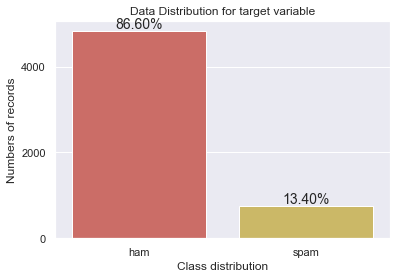

In [36]:
import seaborn as sns
total_len = len(df_SMS['labels'])
percentage_labels = (df_SMS['labels'].value_counts()/total_len)*100
percentage_labels
sns.set()
sns.set_palette("hls", 8)

sns.countplot(df_SMS['labels']).set_title('Data Distribution for target variable')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=3)
ax.set_xlabel("Class distribution")
ax.set_ylabel("Numbers of records")
plt.show()


In [38]:
#KNN for word2vec
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(train_matrix,labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
#NB with word2vec
spam_detect_model = MultinomialNB().fit(train_matrix, labels_train)

In [40]:
all_predictions = spam_detect_model.predict(train_matrix)

In [41]:
from sklearn.metrics import classification_report
print (classification_report(labels_train, all_predictions))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      3861
        spam       0.90      0.82      0.86       598

   micro avg       0.96      0.96      0.96      4459
   macro avg       0.94      0.91      0.92      4459
weighted avg       0.96      0.96      0.96      4459

